In [1]:
#Import our standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Load Boston Dataset
fname = "boston.csv"
df = pd.read_csv(fname) 

In [3]:
#Glimpse of data
df.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


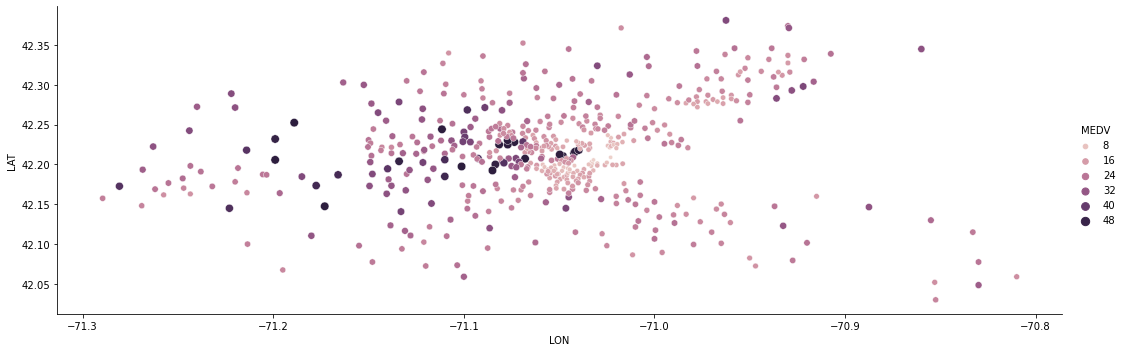

In [4]:
sns.relplot(data = df,
            x = 'LON',
            y = 'LAT',
            size = 'MEDV',
            hue = 'MEDV',
            kind = 'scatter',
            s = 100,
            aspect =3 )
plt.show()

In [5]:
df.shape

(506, 16)

In [6]:
#Create Independent and Dependent Variables
X = df.drop(['MEDV','TOWN','TRACT'], axis = 1)
y = df['MEDV']

In [7]:
X.head()

,LON,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,-70.955,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,-70.950,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,-70.936,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,-70.928,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,-70.922,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [8]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)

In [9]:
n_cols = X.shape[1]

In [10]:
nn_model = Sequential()

nn_model.add(Dense(1, activation='linear', input_shape = (n_cols,)))

nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))
nn_model.add(Dense(100, activation='relu'))

nn_model.add(Dense(1,activation='linear'))

In [11]:
opt = Adam(learning_rate=0.01)
nn_model.compile(optimizer= opt,loss='mean_squared_error',metrics=['mean_squared_error'])

In [12]:
nn_model.fit(X_train,y_train,epochs=500,verbose=1)

Epoch 1/500
13/13 [==============================] - 1s 1ms/step - loss: 367.0569 - mean_squared_error: 367.0569
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 172.9754 - mean_squared_error: 172.9754
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 136.5817 - mean_squared_error: 136.5817
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 125.6097 - mean_squared_error: 125.6097
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 103.2762 - mean_squared_error: 103.2762
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 91.3950 - mean_squared_error: 91.3950
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 83.0332 - mean_squared_error: 83.0332
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 85.7061 - mean_squared_error: 85.7061
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 72.3385 - mean_squared_error:

Epoch 147/500
13/13 [==============================] - 0s 1ms/step - loss: 27.0644 - mean_squared_error: 27.0644
Epoch 148/500
13/13 [==============================] - 0s 1ms/step - loss: 24.7895 - mean_squared_error: 24.7895
Epoch 149/500
13/13 [==============================] - 0s 542us/step - loss: 25.9460 - mean_squared_error: 25.9460
Epoch 150/500
13/13 [==============================] - 0s 1ms/step - loss: 26.3101 - mean_squared_error: 26.3101
Epoch 151/500
13/13 [==============================] - 0s 1ms/step - loss: 34.2398 - mean_squared_error: 34.2398
Epoch 152/500
13/13 [==============================] - 0s 1ms/step - loss: 31.3282 - mean_squared_error: 31.3282
Epoch 153/500
13/13 [==============================] - 0s 1ms/step - loss: 29.9209 - mean_squared_error: 29.9209
Epoch 154/500
13/13 [==============================] - 0s 1ms/step - loss: 23.3777 - mean_squared_error: 23.3777
Epoch 155/500
13/13 [==============================] - 0s 1ms/step - loss: 27.9464 - mean_squa

13/13 [==============================] - 0s 1ms/step - loss: 23.1834 - mean_squared_error: 23.1834
Epoch 292/500
13/13 [==============================] - 0s 1ms/step - loss: 23.9281 - mean_squared_error: 23.9281
Epoch 293/500
13/13 [==============================] - 0s 1ms/step - loss: 21.9419 - mean_squared_error: 21.9419
Epoch 294/500
13/13 [==============================] - 0s 0s/step - loss: 21.6656 - mean_squared_error: 21.6656
Epoch 295/500
13/13 [==============================] - 0s 1ms/step - loss: 21.4805 - mean_squared_error: 21.4805
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 22.3278 - mean_squared_error: 22.3278
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 30.7558 - mean_squared_error: 30.7558
Epoch 298/500
13/13 [==============================] - 0s 0s/step - loss: 26.1110 - mean_squared_error: 26.1110
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 21.9528 - mean_squared_error: 21.9528

13/13 [==============================] - 0s 1ms/step - loss: 21.0094 - mean_squared_error: 21.0094
Epoch 436/500
13/13 [==============================] - 0s 0s/step - loss: 21.5713 - mean_squared_error: 21.5713
Epoch 437/500
13/13 [==============================] - 0s 2ms/step - loss: 21.4724 - mean_squared_error: 21.4724
Epoch 438/500
13/13 [==============================] - 0s 1ms/step - loss: 20.8786 - mean_squared_error: 20.8786
Epoch 439/500
13/13 [==============================] - 0s 0s/step - loss: 27.0608 - mean_squared_error: 27.0608
Epoch 440/500
13/13 [==============================] - 0s 0s/step - loss: 23.5935 - mean_squared_error: 23.5935
Epoch 441/500
13/13 [==============================] - 0s 1ms/step - loss: 21.8445 - mean_squared_error: 21.8445
Epoch 442/500
13/13 [==============================] - 0s 1ms/step - loss: 21.5334 - mean_squared_error: 21.5334
Epoch 443/500
13/13 [==============================] - 0s 1ms/step - loss: 22.7393 - mean_squared_error: 22.7393


In [13]:
predictions = nn_model.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [14]:
score = nn_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 0s/step - loss: 39.9707 - mean_squared_error: 39.9707


In [15]:
score

[39.97066879272461, 39.97066879272461]

In [16]:
#accuracy for regression using RMSE and R2
from sklearn.metrics import mean_squared_error, r2_score
print("R2: ", r2_score(y_test, predictions))
print("RMSE: ", mean_squared_error(y_test, predictions))

R2:  0.6488036487804285
RMSE:  39.9706680589702


In [17]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 10)

In [18]:
nn_model2 = Sequential()

nn_model2.add(Dense(1, activation='linear', input_shape = (n_cols,)))

nn_model2.add(Dense(500, activation='relu'))
nn_model2.add(Dense(500, activation='relu'))
nn_model2.add(Dense(500, activation='relu'))
nn_model2.add(Dense(500, activation='relu'))

nn_model2.add(Dense(1))

opt = Adam(0.001)
nn_model2.compile(optimizer= opt,loss='mean_squared_error',metrics=['mean_squared_error'])

model = nn_model2.fit(X_train,y_train,epochs=500,verbose=0,
             validation_data = [X_test, y_test])

In [19]:
#Check the accuracy of the model
print('training accuracy:', nn_model2.evaluate(X_train, y_train))
print('test accuracy:',nn_model2.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 35.2341 - mean_squared_error: 35.2341
training accuracy: [35.234066009521484, 35.234066009521484]
4/4 [==============================] - 0s 1ms/step - loss: 74.9170 - mean_squared_error: 74.9170
test accuracy: [74.91696166992188, 74.91696166992188]


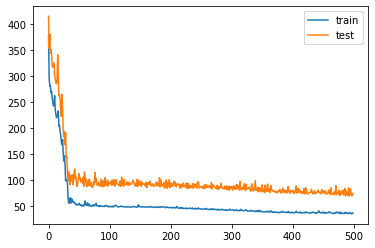

In [20]:
# plot training history
plt.plot(model.history['loss'], label='train')
plt.plot(model.history['val_loss'], label='test')
plt.legend()
plt.show()

In [21]:
predictions = nn_model2.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [22]:
#accuracy for regression using RMSE and R2
from sklearn.metrics import mean_squared_error, r2_score
print("R2: ", r2_score(y_test, predictions))
print("RMSE: ", mean_squared_error(y_test, predictions))

R2:  0.34175326516794235
RMSE:  74.91695641912726


In [23]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_cc = keras.Model(inputs=[input_], outputs=[output])


In [24]:
opt = Adam()
model_cc.compile(optimizer= opt,loss='mean_squared_error',metrics=['mean_squared_error'])

model_cc_fit = model_cc.fit(X_train,y_train,epochs=500,verbose=0,
             validation_data = [X_test, y_test])

In [25]:
#Check the accuracy of the model
print('training accuracy:', model_cc.evaluate(X_train, y_train))
print('test accuracy:',model_cc.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 22.2867 - mean_squared_error: 22.2867
training accuracy: [22.286731719970703, 22.286731719970703]
4/4 [==============================] - 0s 0s/step - loss: 47.5250 - mean_squared_error: 47.5250
test accuracy: [47.52501678466797, 47.52501678466797]


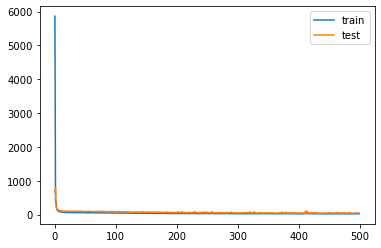

In [26]:
# plot training history
plt.plot(model_cc_fit.history['loss'], label='train')
plt.plot(model_cc_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:
#accuracy for regression using RMSE and R2
predictions = model_cc.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("R2: ", r2_score(y_test, predictions))
print("RMSE: ", mean_squared_error(y_test, predictions))

4/4 [==============================] - 0s 0s/step
R2:  0.5824283675135487
RMSE:  47.52502995830699


In [28]:
input_ = keras.layers.Input(shape=n_cols)
hidden1 = keras.layers.Dense(300, activation="relu")(input_)
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(300, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(300, activation="relu")(hidden3)
concat = keras.layers.Concatenate()([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model_cc = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
opt = Adam()
model_cc.compile(optimizer= opt,loss='mean_squared_error',metrics=['mean_squared_error'])

model_cc_fit = model_cc.fit(X_train,y_train,epochs=500,verbose=0,
             validation_data = [X_test, y_test])